# **1. Perkenalan Dataset**

Dataset yang digunakan adalah personal Spotify Listening History dari Kaggle:

Sumber Dataset: https://www.kaggle.com/datasets/sergiykovalchuck/the-most-popular-books-for-exchanging

Dataset berisi informasi seperti:

- Judul buku (Book Title)
- Penulis (Author)
- ISBN
- Tahun publikasi (Year of Publication)
- Penerbit (Publisher)
- Rating rata-rata
- Jumlah rating/review
- Genre/kategori

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [51]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1bvUGtnA-FsPQV9eETzetjX-IWcizimbi')
(df.head())

,id,title,author,genre,language,publicationYear,publisher,description,pageCount,tags,rating_average,most_popular_country,bestseller_status,awards,age_category,adapted_to_movie,movie_release_year,isbn
0,1,Harry Potter and the Sorcerer's Stone,J.K. Rowling,Fantasy,English,1997,Bloomsbury,A young wizard discovers his magical heritage ...,309,"magic,school,adventure",4.89,UK,True,"Smarties Prize,British Book Award",Children,True,2001.0,978-0747532743
1,2,To Kill a Mockingbird,Harper Lee,Southern Gothic,English,1960,J.B. Lippincott & Co.,A lawyer in the Depression-era South defends a...,281,"classic,law,racism,history",4.85,USA,True,Pulitzer Prize,Adult,True,1962.0,978-0061120084
2,3,1984,George Orwell,Dystopian,English,1949,Secker & Warburg,A dystopian social science fiction novel and c...,328,"politics,scifi,totalitarianism",4.80,UK,True,Prometheus Hall of Fame,Adult,True,1984.0,978-0451524935
3,4,The Great Gatsby,F. Scott Fitzgerald,Tragedy,English,1925,Charles Scribner's Sons,A story of the fabulously wealthy Jay Gatsby a...,180,"classic,wealth,romance,jazz age",4.40,USA,True,NaN,Adult,True,2013.0,978-0743273565
4,5,The Hobbit,J.R.R. Tolkien,Fantasy,English,1937,George Allen & Unwin,"Bilbo Baggins, a hobbit, is swept into an epic...",310,"adventure,dragons,magic",4.75,UK,True,Keith Barker Millennium Book Award,Children,True,2012.0,978-0547928227


In [52]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    990 non-null    int64  
 1   title                 990 non-null    object 
 2   author                990 non-null    object 
 3   genre                 990 non-null    object 
 4   language              990 non-null    object 
 5   publicationYear       990 non-null    int64  
 6   publisher             990 non-null    object 
 7   description           990 non-null    object 
 8   pageCount             990 non-null    int64  
 9   tags                  990 non-null    object 
 10  rating_average        990 non-null    float64
 11  most_popular_country  990 non-null    object 
 12  bestseller_status     990 non-null    bool   
 13  awards                384 non-null    object 
 14  age_category          990 non-null    object 
 15  adapted_to_movie      9

In [53]:
(df.describe())

,id,publicationYear,pageCount,rating_average,movie_release_year
count,990.000000,990.000000,990.000000,990.000000,642.000000
mean,502.079798,1962.996970,378.904040,4.061949,1997.704050
std,289.286296,195.433466,190.567626,0.241120,22.531925
min,1.000000,-750.000000,22.000000,3.140000,1926.000000
25%,252.250000,1965.250000,256.000000,3.920000,1987.000000
50%,503.500000,1997.000000,341.500000,4.070000,2005.000000
75%,752.750000,2010.000000,452.750000,4.220000,2015.000000
max,1003.000000,2023.000000,1463.000000,4.950000,2025.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


--- Missing Values ---
                    Missing_Count  Percentage
awards                        606   61.212121
movie_release_year            348   35.151515

--- Distribusi Target Variable (bestseller_status) ---
bestseller_status
True     986
False      4
Name: count, dtype: int64

Persentase:
bestseller_status
True     99.59596
False     0.40404
Name: proportion, dtype: float64


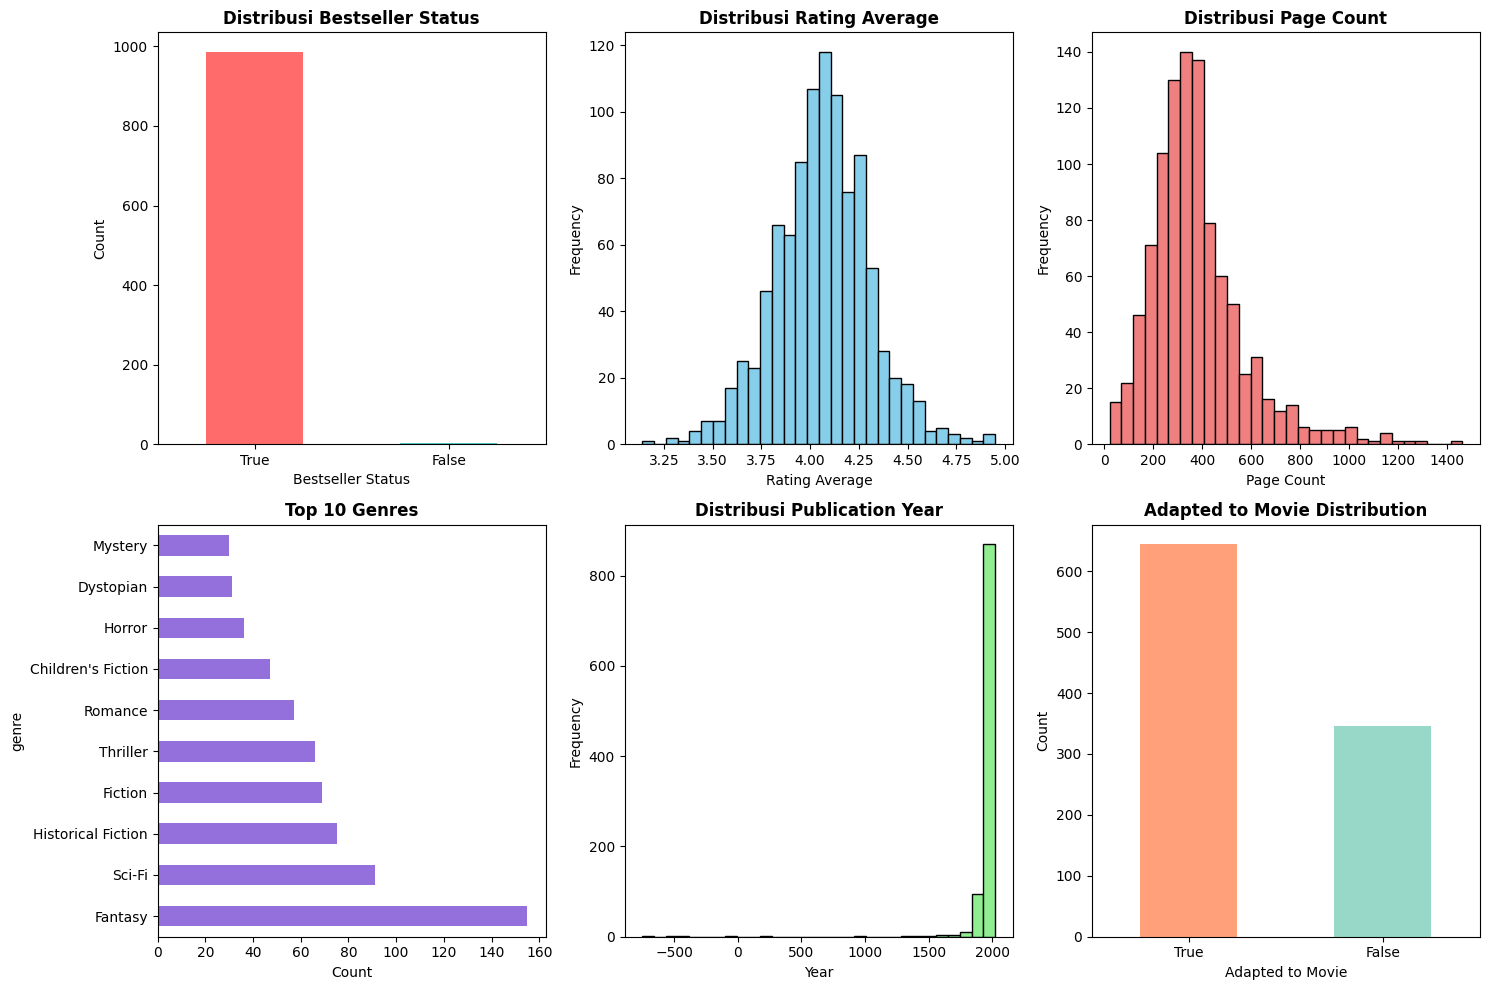


--- Analisis Korelasi Numerik dengan Bestseller Status ---
bestseller_status     1.000000
rating_average        0.075837
pageCount            -0.009730
publicationYear      -0.012555
movie_release_year   -0.014391
Name: bestseller_status, dtype: float64


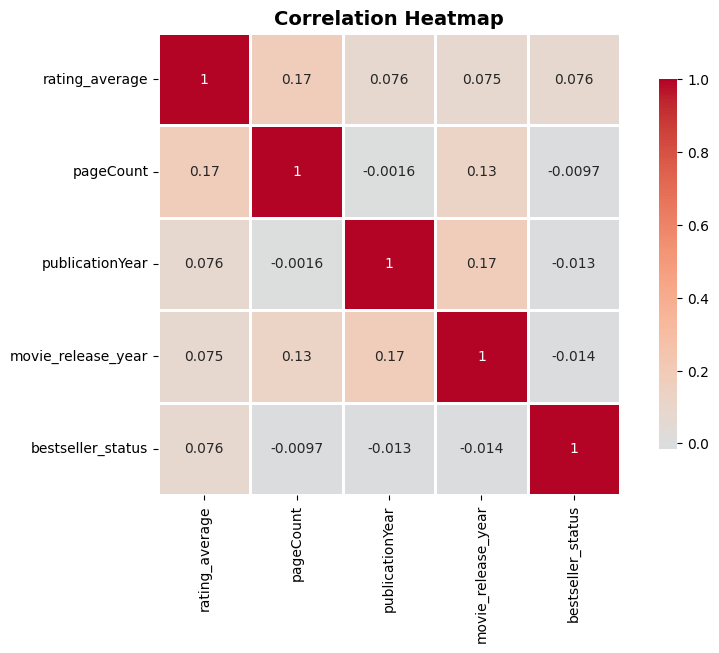

In [54]:
print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

# 3.4 Distribusi Target Variable (bestseller_status)
print("\n--- Distribusi Target Variable (bestseller_status) ---")
print(df['bestseller_status'].value_counts())
print(f"\nPersentase:")
print(df['bestseller_status'].value_counts(normalize=True) * 100)

# Visualisasi
plt.figure(figsize=(15, 10))

# Plot 1: Distribusi Bestseller Status
plt.subplot(2, 3, 1)
df['bestseller_status'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.title('Distribusi Bestseller Status', fontsize=12, fontweight='bold')
plt.xlabel('Bestseller Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plot 2: Distribusi Rating Average
plt.subplot(2, 3, 2)
plt.hist(df['rating_average'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Rating Average', fontsize=12, fontweight='bold')
plt.xlabel('Rating Average')
plt.ylabel('Frequency')

# Plot 3: Distribusi Page Count
plt.subplot(2, 3, 3)
plt.hist(df['pageCount'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribusi Page Count', fontsize=12, fontweight='bold')
plt.xlabel('Page Count')
plt.ylabel('Frequency')

# Plot 4: Top 10 Genres
plt.subplot(2, 3, 4)
top_genres = df['genre'].value_counts().head(10)
top_genres.plot(kind='barh', color='mediumpurple')
plt.title('Top 10 Genres', fontsize=12, fontweight='bold')
plt.xlabel('Count')

# Plot 5: Publication Year Distribution
plt.subplot(2, 3, 5)
plt.hist(df['publicationYear'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribusi Publication Year', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Plot 6: Adapted to Movie
plt.subplot(2, 3, 6)
df['adapted_to_movie'].value_counts().plot(kind='bar', color=['#FFA07A', '#98D8C8'])
plt.title('Adapted to Movie Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Adapted to Movie')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# 3.5 Korelasi dengan Target
print("\n--- Analisis Korelasi Numerik dengan Bestseller Status ---")
numeric_cols = ['rating_average', 'pageCount', 'publicationYear', 'movie_release_year']
correlation_data = df[numeric_cols + ['bestseller_status']].copy()
correlation_data['bestseller_status'] = correlation_data['bestseller_status'].astype(int)

correlation = correlation_data.corr()['bestseller_status'].sort_values(ascending=False)
print(correlation)

# Visualisasi Korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [55]:
# Buat copy dataset
df_processed = df.copy()

# Handling Missing Values
print("\n--- Step 1: Handling Missing Values ---")

# Drop kolom dengan missing values >50%
threshold = 0.5
missing_ratio = df_processed.isnull().sum() / len(df_processed)
cols_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()
print(f"✓ Kolom dengan missing values >50%: {cols_to_drop}")
df_processed = df_processed.drop(columns=cols_to_drop)

# Imputasi numerik dengan median
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_processed[col].isnull().sum() > 0:
        median_value = df_processed[col].median()
        df_processed[col].fillna(median_value, inplace=True)
        print(f"✓ {col}: filled with median ({median_value:.2f})")

# Imputasi kategorikal dengan mode
categorical_cols = df_processed.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        mode_value = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_value, inplace=True)
        print(f"✓ {col}: filled with mode ({mode_value})")

print(f"\n✓ Missing values setelah imputasi: {df_processed.isnull().sum().sum()}")


--- Step 1: Handling Missing Values ---
✓ Kolom dengan missing values >50%: ['awards']
✓ movie_release_year: filled with median (2005.00)

✓ Missing values setelah imputasi: 0


In [56]:
# Feature Engineering
print("\n--- Step 2: Feature Engineering ---")

# Book Age
df_processed['book_age'] = 2024 - df_processed['publicationYear']
print("✓ Created: book_age")

# Title Length
df_processed['title_length'] = df_processed['title'].str.len()
print("✓ Created: title_length")

# Description Length
if 'description' in df_processed.columns:
    df_processed['description_length'] = df_processed['description'].str.len()
    df_processed['description_length'].fillna(0, inplace=True)
    print("✓ Created: description_length")

# Tags Count
if 'tags' in df_processed.columns:
    df_processed['tags_count'] = df_processed['tags'].str.count(',') + 1
    df_processed['tags_count'].fillna(0, inplace=True)
    print("✓ Created: tags_count")

# Rating Category
df_processed['rating_category'] = pd.cut(
    df_processed['rating_average'],
    bins=[0, 3.5, 4.0, 4.5, 5.0],
    labels=['Low', 'Medium', 'High', 'Very High']
)
print("✓ Created: rating_category")


--- Step 2: Feature Engineering ---
✓ Created: book_age
✓ Created: title_length
✓ Created: description_length
✓ Created: tags_count
✓ Created: rating_category


In [57]:
# Encoding Categorical Variables
print("\n--- Step 3: Encoding Categorical Variables ---")

# Target encoding (bestseller_status sudah boolean, convert ke int)
df_processed['bestseller_status'] = df_processed['bestseller_status'].astype(int)

# Label Encoding untuk kolom kategorikal dengan banyak kategori unik
label_encoders = {}
categorical_features = ['genre', 'language', 'publisher', 'most_popular_country',
                        'age_category', 'rating_category']

for col in categorical_features:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"✓ Encoded: {col} → {col}_encoded")

# One-Hot Encoding untuk adapted_to_movie (binary)
df_processed['adapted_to_movie'] = df_processed['adapted_to_movie'].astype(int)
print("✓ Converted: adapted_to_movie to binary")


--- Step 3: Encoding Categorical Variables ---
✓ Encoded: genre → genre_encoded
✓ Encoded: language → language_encoded
✓ Encoded: publisher → publisher_encoded
✓ Encoded: most_popular_country → most_popular_country_encoded
✓ Encoded: age_category → age_category_encoded
✓ Encoded: rating_category → rating_category_encoded
✓ Converted: adapted_to_movie to binary


In [58]:
# Feature Selection
print("\n--- Step 4: Feature Selection ---")

# Pilih fitur untuk modeling
feature_columns = [
    'rating_average', 'pageCount', 'publicationYear', 'book_age',
    'title_length', 'adapted_to_movie',
    'genre_encoded', 'language_encoded', 'age_category_encoded'
]

# Tambahkan kolom tambahan jika ada
optional_features = ['description_length', 'tags_count', 'publisher_encoded',
                     'most_popular_country_encoded', 'rating_category_encoded']
for feat in optional_features:
    if feat in df_processed.columns:
        feature_columns.append(feat)

print(f"✓ Selected features: {feature_columns}")

# Filter dataset final
df_final = df_processed[feature_columns + ['bestseller_status']].copy()
print(f"\n✓ Final dataset shape: {df_final.shape}")



--- Step 4: Feature Selection ---
✓ Selected features: ['rating_average', 'pageCount', 'publicationYear', 'book_age', 'title_length', 'adapted_to_movie', 'genre_encoded', 'language_encoded', 'age_category_encoded', 'description_length', 'tags_count', 'publisher_encoded', 'most_popular_country_encoded', 'rating_category_encoded']

✓ Final dataset shape: (990, 15)


In [60]:
# Handle Outliers (Optional - IQR Method)
print("\n--- Step 5: Handling Outliers (IQR Method) ---")

numeric_features = ['rating_average', 'pageCount', 'book_age']
for col in numeric_features:
    if col in df_final.columns:
        Q1 = df_final[col].quantile(0.25)
        Q3 = df_final[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((df_final[col] < lower_bound) | (df_final[col] > upper_bound)).sum()
        df_final[col] = df_final[col].clip(lower_bound, upper_bound)
        print(f"✓ {col}: capped {outliers} outliers")


--- Step 5: Handling Outliers (IQR Method) ---
✓ rating_average: capped 0 outliers
✓ pageCount: capped 0 outliers
✓ book_age: capped 0 outliers


In [61]:
# Feature Scaling
print("\n--- Step 6: Feature Scaling ---")

scaler = StandardScaler()
features_to_scale = [col for col in feature_columns if col in df_final.columns]
df_final[features_to_scale] = scaler.fit_transform(df_final[features_to_scale])
print(f"✓ Scaled {len(features_to_scale)} features using StandardScaler")

# Train-Test Split
print("\n--- Step 7: Train-Test Split ---")

X = df_final.drop('bestseller_status', axis=1)
y = df_final['bestseller_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Training set: {X_train.shape}")
print(f"✓ Testing set: {X_test.shape}")
print(f"✓ Target distribution in training set:")
print(y_train.value_counts(normalize=True))



--- Step 6: Feature Scaling ---
✓ Scaled 14 features using StandardScaler

--- Step 7: Train-Test Split ---
✓ Training set: (792, 14)
✓ Testing set: (198, 14)
✓ Target distribution in training set:
bestseller_status
1    0.996212
0    0.003788
Name: proportion, dtype: float64


In [62]:
# ============================================================================
# 5. SAVE PREPROCESSED DATA
# ============================================================================
print("\n" + "="*80)
print("TAHAP 4: SAVING PREPROCESSED DATA")
print("="*80)

# Buat folder preprocessing jika belum ada
import os
os.makedirs('preprocessing', exist_ok=True)

# Save preprocessed dataset
df_final.to_csv('preprocessing/top_1000_books_preprocessed.csv', index=False)
print("✓ Preprocessed data saved to: preprocessing/top_1000_books_preprocessed.csv")

# Save train-test split
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('preprocessing/train_data.csv', index=False)
test_data.to_csv('preprocessing/test_data.csv', index=False)
print("✓ Train data saved to: preprocessing/train_data.csv")
print("✓ Test data saved to: preprocessing/test_data.csv")



TAHAP 4: SAVING PREPROCESSED DATA
✓ Preprocessed data saved to: preprocessing/top_1000_books_preprocessed.csv
✓ Train data saved to: preprocessing/train_data.csv
✓ Test data saved to: preprocessing/test_data.csv
